## This script is used to create a complete map

The major elements of map will be included

In [49]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


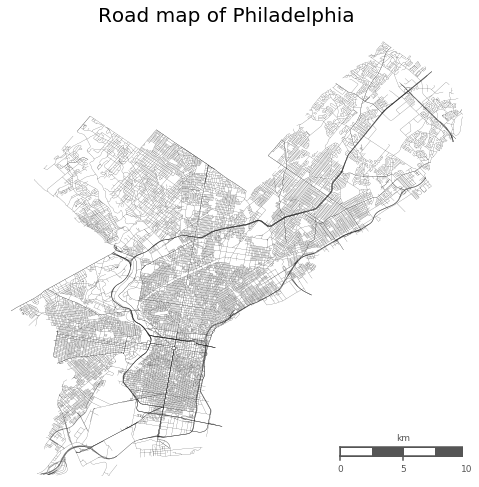

In [52]:
import os
import matplotlib.pyplot as plt
import shapefile
from mpl_toolkits.basemap import Basemap

title = 'Road map of Philadelphia'
description = 'Roads and railways of the New York metropolitan area as of October 10, 2016.\nData: OpenStreetMap - openstreetmap.org | Mapzen - mapzen.com\nAuthor: Ramiro Gómez - ramiro.org'
# imgfile = '../img/{}.png'.format(slug(title))
shpfile = os.path.expanduser('data/tl_2017_42101_roads')
census_tract = os.path.expanduser('data/Census_Tracts_2010')

fontcolor='#666666'

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, frame_on=True)

fig.suptitle(title, fontsize=20, y=.94, color='black')

sf = shapefile.Reader(shpfile)

x0, y0 ,x1, y1 = sf.bbox
cx, cy = (x0 + x1) / 2, (y0 + y1) / 2

m = Basemap(llcrnrlon=x0, llcrnrlat=y0, urcrnrlon=x1, urcrnrlat=y1, lat_0=cx, lon_0=cy, resolution='c', projection='mill')

# Avoid border around map.
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

m.readshapefile(shpfile, 'tl_2017_42101_roads', linewidth=.15)

# Draw a map scale
m.drawmapscale(
    x0 + 0.28, y0 + 0.015, # the location of the scale bar, cannot be outside of the map
    x1, y1,
    10., # the size of the scale bar
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)

# plt.annotate(description, xy=(.58, 0.005), size=16, xycoords='axes fraction', color=fontcolor)
# plt.tight_layout()
plt.savefig('imgfile.png', bbox_inches='tight', pad_inches=.2)
plt.show(fig)


### data source
https://catalog.data.gov/dataset/tiger-line-shapefile-2017-county-philadelphia-county-pa-all-roads-county-based-shapefile

/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


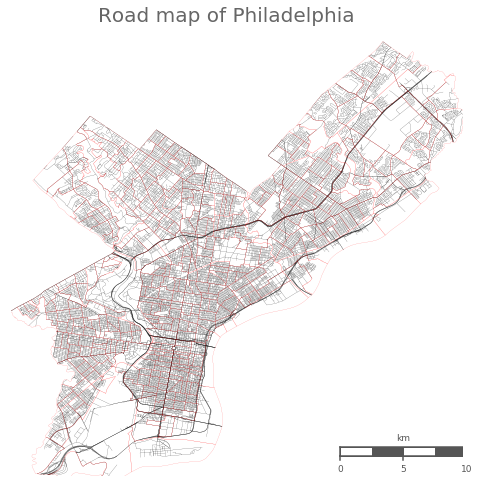

In [5]:
import os

import matplotlib.pyplot as plt
import shapefile

# from helpers import slug
from mpl_toolkits.basemap import Basemap


title = 'Road map of Philadelphia'
description = 'Roads and railways of the New York metropolitan area as of October 10, 2016.\nData: OpenStreetMap - openstreetmap.org | Mapzen - mapzen.com\nAuthor: Ramiro Gómez - ramiro.org'
# imgfile = '../img/{}.png'.format(slug(title))
shpfile = os.path.expanduser('data/tl_2017_42101_roads')
census_tract = os.path.expanduser('data/Census_Tracts_2010')

fontcolor='#666666'

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, frame_on=False)
fig.suptitle(title, fontsize=20, y=.94, color=fontcolor)

sf = shapefile.Reader(shpfile)

x0, y0 ,x1, y1 = sf.bbox
cx, cy = (x0 + x1) / 2, (y0 + y1) / 2

m = Basemap(llcrnrlon=x0, llcrnrlat=y0, urcrnrlon=x1, urcrnrlat=y1, lat_0=cx, lon_0=cy, resolution='c', projection='mill')

# Avoid border around map.
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

m.readshapefile(shpfile, 'shp', linewidth=.15)
m.readshapefile(census_tract, 'shp', linewidth=0.1, color='red')

# Draw a map scale
m.drawmapscale(
    x0 + 0.28, y0 + 0.015, # the location of the scale bar, cannot be outside of the map
    x1, y1,
    10., # the size of the scale bar
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)

# plt.annotate(description, xy=(.58, 0.005), size=16, xycoords='axes fraction', color=fontcolor)
# plt.tight_layout()
plt.savefig('imgfile.png', bbox_inches='tight', pad_inches=.2)


In [67]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.text as mtext
import matplotlib.font_manager as mfonts
import cartopy.crs as ccrs


def add_osgb_scalebar(ax, at_x=(0.1, 0.4), at_y=(0.05, 0.075), max_stripes=5):
    """
    Add a scalebar to a GeoAxes of type cartopy.crs.OSGB (only).

    Args:
    * at_x : (float, float)
        target axes X coordinates (0..1) of box (= left, right)
    * at_y : (float, float)
        axes Y coordinates (0..1) of box (= lower, upper)
    * max_stripes
        typical/maximum number of black+white regions
    """
#     # ensure axis is an OSGB map (meaning coords are just metres)
#     assert isinstance(ax.projection, ccrs.OSGB)
    
    # fetch axes coordinate mins+maxes
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    # set target rectangle in-visible-area (aka 'Axes') coordinates
    ax0, ax1 = at_x
    ay0, ay1 = at_y
    # choose exact X points as sensible grid ticks with Axis 'ticker' helper
    x_targets = [x0 + ax * (x1 - x0) for ax in (ax0, ax1)]
    ll = mpl.ticker.MaxNLocator(nbins=max_stripes, steps=[1,2,4,5,10])
    x_vals = ll.tick_values(*x_targets)
    # grab min+max for limits
    xl0, xl1 = x_vals[0], x_vals[-1]
    # calculate Axes Y coordinates of box top+bottom
    yl0, yl1 = [y0 + ay * (y1 - y0) for ay in [ay0, ay1]]
    # calculate Axes Y distance of ticks + label margins
    y_margin = (yl1-yl0)*0.25

    # fill black/white 'stripes' and draw their boundaries
    fill_colors = ['black', 'white']
    i_color = 0
    for xi0, xi1 in zip(x_vals[:-1],x_vals[1:]):
        # fill region
        plt.fill((xi0, xi1, xi1, xi0, xi0), (yl0, yl0, yl1, yl1, yl0),
                 fill_colors[i_color])
        # draw boundary
        plt.plot((xi0, xi1, xi1, xi0, xi0), (yl0, yl0, yl1, yl1, yl0),
                 'black')
        i_color = 1 - i_color

    # add short tick lines
    for x in x_vals:
        plt.plot((x, x), (yl0, yl0-y_margin), 'black')

    # add a scale legend 'Km'
    font_props = mfonts.FontProperties(size='medium', weight='bold')
    plt.text(
        0.5 * (xl0 + xl1),
        yl1 + y_margin,
        'Km',
        verticalalignment='bottom',
        horizontalalignment='center',
        fontproperties=font_props)
    
    # add numeric labels
    for x in x_vals:
        plt.text(x,
                 yl0 - 2 * y_margin,
                 '{:g}'.format((x - xl0) * 0.001),
                 verticalalignment='top',
                 horizontalalignment='center',
                 fontproperties=font_props)
    
    

In [9]:
df_map.head()

,census_tra,data_redac,num_bll_5p,num_screen,perc_5plus,geometry
0,42101000100,0,0.0,100.0,0.0,"POLYGON ((-75.14147213273969 39.9517072267047,..."
1,42101000200,1,NaN,109.0,NaN,"POLYGON ((-75.162377698504 39.9576545523082, -..."
2,42101000300,1,NaN,110.0,NaN,"POLYGON ((-75.17820482839041 39.9598134132842,..."
3,42101000401,1,NaN,61.0,NaN,"POLYGON ((-75.1729917788024 39.9546437050483, ..."
4,42101000402,0,0.0,41.0,0.0,"POLYGON ((-75.1633313650233 39.9533392100125, ..."


In [24]:
df_map.head()

,census_tra,data_redac,num_bll_5p,num_screen,perc_5plus,geometry
0,42101000100,0,0.0,100.0,0.0,"POLYGON ((-75.14147213273969 39.9517072267047,..."
1,42101000200,1,NaN,109.0,NaN,"POLYGON ((-75.162377698504 39.9576545523082, -..."
2,42101000300,1,NaN,110.0,NaN,"POLYGON ((-75.17820482839041 39.9598134132842,..."
3,42101000401,1,NaN,61.0,NaN,"POLYGON ((-75.1729917788024 39.9546437050483, ..."
4,42101000402,0,0.0,41.0,0.0,"POLYGON ((-75.1633313650233 39.9533392100125, ..."


In [27]:
shapefile = 'data/child_blood_lead_levels_by_ct.shp'

df = gpd.read_file(shapefile)

In [48]:
import matplotlib as mpl
from matplotlib.patches import Polygon
import numpy as np
from matplotlib.collections import PatchCollection
import fiona
from itertools import chain
import math


fig = plt.figure(figsize=(22, 12))

shapefile = 'data/Census_Tracts_2010.shp'

shp = fiona.open(shapefile)
bds = shp.bounds
shp.close()
extra = 0.05
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))

w, h = coords[2] - coords[0], coords[3] - coords[1]
extra = 0.01

llcrnrlon=coords[0] - extra * w,
llcrnrlat=coords[1] - extra * h,
urcrnrlon=coords[2] + extra * w,
urcrnrlat=coords[3] + extra * h,

lon_0 = math.floor(coords[0])
lat_0 = math.floor(coords[1])


m = Basemap(
            projection='tmerc',
            lon_0=lon_0,
            lat_0=lat_0,
            ellps = 'WGS84',
            llcrnrlon=coords[0] - extra * w,
            llcrnrlat=coords[1] - extra * h,
            urcrnrlon=coords[2] + extra * w,
            urcrnrlat=coords[3] + extra * h,
            lat_ts=0,
            resolution='i',
            suppress_ticks=True,
            ax=ax)



# # mpl.style.use('map')

# ax = fig.add_subplot(111, frame_on=False)
# # fig.suptitle('Forest area as percentage of land area in {}'.format(year), fontsize=30, y=.95)

# m = Basemap(lon_0=0, projection='robin')
# m.drawmapboundary(color='w')


m.readshapefile(
                shapefile.replace('.shp',''),
                'geom',
                color='#202020',
                zorder=1)


plt.savefig('imgfile.png', bbox_inches='tight', pad_inches=.2)


# m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
# for info, shape in zip(m.units_info, m.units):
#     iso3 = info['perc_5plus']
#     if iso3 not in df.index:
#         color = '#dddddd'
# #     else:
# #         color = scheme[df.ix[iso3]['bin']]

#     patches = [Polygon(np.array(shape), True)]
#     pc = PatchCollection(patches)
#     pc.set_facecolor('red')
#     ax.add_collection(pc)
plt.show(fig)

/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


<Figure size 1584x864 with 0 Axes>

/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


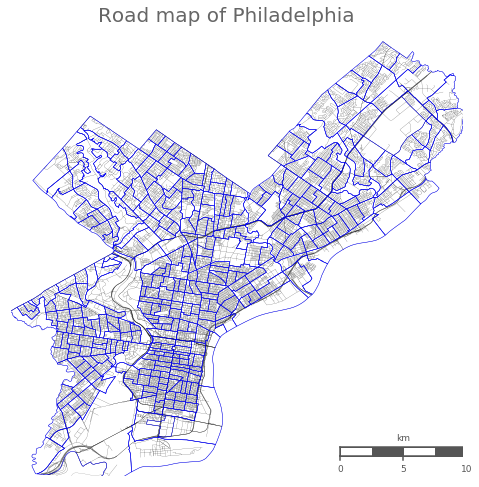

In [53]:
import os

import matplotlib.pyplot as plt
import shapefile

# from helpers import slug
from mpl_toolkits.basemap import Basemap


title = 'Road map of Philadelphia'
description = 'Roads and railways of the New York metropolitan area as of October 10, 2016.\nData: OpenStreetMap - openstreetmap.org | Mapzen - mapzen.com\nAuthor: Ramiro Gómez - ramiro.org'
# imgfile = '../img/{}.png'.format(slug(title))
shpfile = os.path.expanduser('data/tl_2017_42101_roads')
census_tract = os.path.expanduser('data/Census_Tracts_2010')
blood_lead = 'data/child_blood_lead_levels_by_ct'

fontcolor='#666666'

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, frame_on=False)
fig.suptitle(title, fontsize=20, y=.94, color=fontcolor)

sf = shapefile.Reader(shpfile)

x0, y0 ,x1, y1 = sf.bbox
cx, cy = (x0 + x1) / 2, (y0 + y1) / 2



cmap = plt.get_cmap('Blues')



m = Basemap(llcrnrlon=x0, llcrnrlat=y0, urcrnrlon=x1, urcrnrlat=y1, lat_0=cx, lon_0=cy, resolution='c', projection='mill')

# Avoid border around map.
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

m.readshapefile(shpfile, 'shp', linewidth=.15)
m.readshapefile(census_tract, 'shp', linewidth=0.1)
m.readshapefile(blood_lead, 'shp', color='blue')

# Draw a map scale
m.drawmapscale(
    x0 + 0.28, y0 + 0.015, # the location of the scale bar, cannot be outside of the map
    x1, y1,
    10., # the size of the scale bar
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)

# plt.annotate(description, xy=(.58, 0.005), size=16, xycoords='axes fraction', color=fontcolor)
# plt.tight_layout()
plt.savefig('imgfile.png', bbox_inches='tight', pad_inches=.2)


In [133]:

import cartopy.crs as ccrs
import numpy as np

def scale_bar(ax, length=None, location=(0.5, 0.05), linewidth=3):
    """
        ax is the axes to draw the scalebar on.
        length is the length of the scalebar in km.
        location is center of the scalebar in axis coordinates.
        (ie. 0.5 is the middle of the plot)
        linewidth is the thickness of the scalebar.
    """
    
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * 10
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]
    
    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length: 
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)        
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length) 
    
    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='b', linewidth=linewidth)
    
    
#     bar_ticks = 5
#     # draw a scale bar that is a set of colored line segments (bar_ticks of these), bar_tickmarks long
#     for i in range(bar_ticks):
#          #  90 degrees = direction of horizontal scale bar
#         end_lat, end_lon = displace(bar_lat0, bar_lon0, 90, bar_tickmark/1000)
        
#         # capstyle must be set so line segments end square
#         #TODO make transform match ax projection
#         ax.plot([bar_lon0, end_lon], [bar_lat0, end_lat], color=bar_color[i%2], linewidth=20, 
#                 transform=ccrs.PlateCarree(), solid_capstyle='butt', alpha = bar_alpha)
#         # start of next bar is end of last bar
#         bar_lon0 = end_lon
#         bar_lat0 = end_lat
    
    
    #Plot the scalebar label
    ax.text(sbx, sby, str(length) + ' km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom')
    

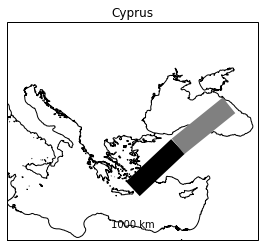

In [178]:
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mercator())
plt.title('Cyprus')
ax.set_extent([10, 42.5, 30, 50], ccrs.Geodetic())
ax.coastlines(resolution='10m')

# bar_ticks = 5
# # draw a scale bar that is a set of colored line segments (bar_ticks of these), bar_tickmarks long
# for i in range(bar_ticks):
#      #  90 degrees = direction of horizontal scale bar
#     end_lat, end_lon = displace(bar_lat0, bar_lon0, 90, bar_tickmark/1000)
    
#     # capstyle must be set so line segments end square
#     #TODO make transform match ax projection
#     ax.plot([bar_lon0, end_lon], [bar_lat0, end_lat], color=bar_color[i%2], linewidth=20, 
#             transform=ccrs.PlateCarree(), solid_capstyle='butt', alpha = bar_alpha)
#     # start of next bar is end of last bar
#     bar_lon0 = end_lon
#     bar_lat0 = end_lat
    
#     scale_bar(ax, 100)


length = 1000
bar_tickmarks = 1000
location=(0.5, 0.05)
linewidth=3

bar_color = ['black', 'grey']

#Get the limits of the axis in lat long
llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())

#Make tmc horizontally centred on the middle of the map,
#vertically at scale bar location
sbllx = (llx1 + llx0) / 2
sblly = lly0 + (lly1 - lly0) * location[1]
tmc = ccrs.TransverseMercator(sbllx, sblly) # convert to projection using meter as unit

#Get the extent of the plotted area in coordinates in metres
x0, x1, y0, y1 = ax.get_extent(tmc)

#Turn the specified scalebar location into coordinates in metres
sbx = x0 + (x1 - x0) * location[0]
sby = y0 + (y1 - y0) * location[1]

# #Calculate a scale bar length if none has been given
# #(Theres probably a more pythonic way of rounding the number but this works)
# if not length:
#     length = (x1 - x0) / 5000 #in km
#     ndim = int(np.floor(np.log10(length))) #number of digits in number
#     length = round(length, -ndim) #round to 1sf
#     #Returns numbers starting with the list
#     def scale_number(x):
#         if str(x)[0] in ['1', '2', '5']: return int(x)        
#         else: return scale_number(x - 10 ** ndim)
#     length = scale_number(length) 


# #Generate the x coordinate for the ends of the scalebar
# bar_xs = [sbx - length * 500, sbx + length * 500]
# #Plot the scalebar
# ax.plot(bar_xs, [sby, sby], transform=tmc, color='b', linewidth=linewidth)


# # bar offset is how far from bottom left corner scale bar is (x,y) and how far up is scale bar text
# bar_offset = [0.05, 0.05, 0.07]
# bar_lon0 = lon0 + (lon1-lon0)*bar_offset[0]
# bar_lat0 = lat0 + (lat1-lat0)*bar_offset[1]

# text_lon0 = bar_lon0
# text_lat0 = lat0 + (lat1-lat0)*bar_offset[2]
# bar_tickmark = 20000 # metres
# bar_ticks = 5
# bar_alpha = 0.3

bar_ticks = 2
length_ticks = bar_tickmarks/bar_ticks


for i in range(bar_ticks):
    bar_xs_start = [sbx + i*length_ticks*1000, sbx + (i+1)*length_ticks*1000]
    bar_xs_end = [sbx + (i+1)*length_ticks*1000, sbx + (i+2)*length_ticks*1000]
    ax.plot(bar_xs_start, bar_xs_end, transform=tmc, color=bar_color[i%2],  solid_capstyle='butt', linewidth='20')


#Plot the scalebar label
ax.text(sbx, sby, str(length) + ' km', transform=tmc,
        horizontalalignment='center', verticalalignment='bottom')

plt.show()

#### Create scale bar and north arrow, pretty rough but good example

https://stackoverflow.com/questions/32333870/how-can-i-show-a-km-ruler-on-a-cartopy-matplotlib-plot/50674451#50674451


/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0xb261f8a98> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


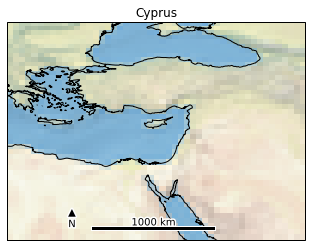

In [184]:
### https://stackoverflow.com/questions/32333870/how-can-i-show-a-km-ruler-on-a-cartopy-matplotlib-plot/50674451#50674451
# Notes:

# if you don't use UTM for you axes, the bar will be drawn crooked
# the North arrow assumes north is up

import os
import cartopy.crs as ccrs
from math import floor
import matplotlib.pyplot as plt
from matplotlib import patheffects
import matplotlib

if os.name == 'nt':
    matplotlib.rc('font', family='Arial')
else:  # might need tweaking, must support black triangle for N arrow
    matplotlib.rc('font', family='DejaVu Sans')


def utm_from_lon(lon):
    """
    utm_from_lon - UTM zone for a longitude

    Not right for some polar regions (Norway, Svalbard, Antartica)

    :param float lon: longitude
    :return: UTM zone number
    :rtype: int
    """
    return floor( ( lon + 180 ) / 6) + 1


def scale_bar(ax, proj, length, location=(0.5, 0.05), linewidth=3,
              units='km', m_per_unit=1000):
    """
    
    http://stackoverflow.com/a/35705477/1072212
    ax is the axes to draw the scalebar on.
    proj is the projection the axes are in
    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
    length is the length of the scalebar in km.
    linewidth is the thickness of the scalebar.
    units is the name of the unit
    m_per_unit is the number of meters in a unit
    """
    # find lat/lon center to find best UTM zone
    x0, x1, y0, y1 = ax.get_extent(proj.as_geodetic())
    # Projection in metres
    utm = ccrs.UTM(utm_from_lon((x0+x1)/2))
    # Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(utm)
    # Turn the specified scalebar location into coordinates in metres
    sbcx, sbcy = x0 + (x1 - x0) * location[0], y0 + (y1 - y0) * location[1]
    # Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbcx - length * m_per_unit/2, sbcx + length * m_per_unit/2]
    # buffer for scalebar
    buffer = [patheffects.withStroke(linewidth=5, foreground="w")]
    # Plot the scalebar with buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, path_effects=buffer)
    # buffer for text
    buffer = [patheffects.withStroke(linewidth=3, foreground="w")]
    # Plot the scalebar label
    t0 = ax.text(sbcx, sbcy, str(length) + ' ' + units, transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    left = x0+(x1-x0)*0.05
    # Plot the N arrow
    t1 = ax.text(left, sbcy, u'\u25B2\nN', transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    # Plot the scalebar without buffer, in case covered by text buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, zorder=3)


if __name__ == '__main__':

    ax = plt.axes(projection=ccrs.LambertCylindrical())
    plt.title('Cyprus')
    ax.set_extent([21, 45.5, 24, 46], ccrs.Geodetic())
    ax.stock_img()
    ax.coastlines(resolution='10m')
    
    scale_bar(ax, ccrs.Mercator(), 1000)  # 100 km scale bar
    # or to use m instead of km
    # scale_bar(ax, ccrs.Mercator(), 100000, m_per_unit=1, units='m')
    # or to use miles instead of km
    # scale_bar(ax, ccrs.Mercator(), 60, m_per_unit=1609.34, units='miles')
    
    plt.show()

#### Another example, very similar with the above example, WORKS, 

https://stackoverflow.com/questions/32333870/how-can-i-show-a-km-ruler-on-a-cartopy-matplotlib-plot/50674451#50674451


/Users/senseablecity/anaconda3/envs/geospatial/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:623: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0xb25e01200> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


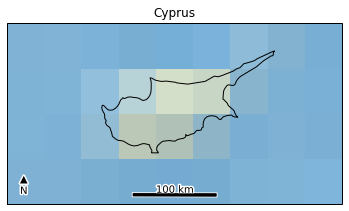

In [176]:
import os
import cartopy.crs as ccrs
from math import floor
import matplotlib.pyplot as plt
from matplotlib import patheffects
import matplotlib

if os.name == 'nt':
    matplotlib.rc('font', family='Arial')
else:  # might need tweaking, must support black triangle for N arrow
    matplotlib.rc('font', family='DejaVu Sans')


def utm_from_lon(lon):
    """
    utm_from_lon - UTM zone for a longitude

    Not right for some polar regions (Norway, Svalbard, Antartica)

    :param float lon: longitude
    :return: UTM zone number
    :rtype: int
    """
    return floor( ( lon + 180 ) / 6) + 1


def scale_bar(ax, proj, length, location=(0.5, 0.05), linewidth=3,
              units='km', m_per_unit=1000):
    """
    
    http://stackoverflow.com/a/35705477/1072212
    ax is the axes to draw the scalebar on.
    proj is the projection the axes are in
    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
    length is the length of the scalebar in km.
    linewidth is the thickness of the scalebar.
    units is the name of the unit
    m_per_unit is the number of meters in a unit
    """
    # find lat/lon center to find best UTM zone
    x0, x1, y0, y1 = ax.get_extent(proj.as_geodetic())
    # Projection in metres
    utm = ccrs.UTM(utm_from_lon((x0+x1)/2))
    # Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(utm)
    # Turn the specified scalebar location into coordinates in metres
    sbcx, sbcy = x0 + (x1 - x0) * location[0], y0 + (y1 - y0) * location[1]
    # Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbcx - length * m_per_unit/2, sbcx + length * m_per_unit/2]
    # buffer for scalebar
    buffer = [patheffects.withStroke(linewidth=5, foreground="w")]
    # Plot the scalebar with buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, path_effects=buffer)
    # buffer for text
    buffer = [patheffects.withStroke(linewidth=3, foreground="w")]
    # Plot the scalebar label
    t0 = ax.text(sbcx, sbcy, str(length) + ' ' + units, transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    left = x0+(x1-x0)*0.05
    # Plot the N arrow
    t1 = ax.text(left, sbcy, u'\u25B2\nN', transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    # Plot the scalebar without buffer, in case covered by text buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, zorder=3)


if __name__ == '__main__':

    ax = plt.axes(projection=ccrs.Mercator())
    plt.title('Cyprus')
    ax.set_extent([31, 35.5, 34, 36], ccrs.Geodetic())
    ax.stock_img()
    ax.coastlines(resolution='10m')
    
    scale_bar(ax, ccrs.Mercator(), 100)  # 100 km scale bar
    # or to use m instead of km
    # scale_bar(ax, ccrs.Mercator(), 100000, m_per_unit=1, units='m')
    # or to use miles instead of km
    # scale_bar(ax, ccrs.Mercator(), 60, m_per_unit=1609.34, units='miles')
    
    plt.show()

## Create scalebar
http://www.net-analysis.com/blog/cartopylayout.html

Draw the outer frame

Text(0.01, 0.01, '© Don Cameron, 2017: net-analysis.com. Map generated at 2019-08-07 23:59:45 from ')

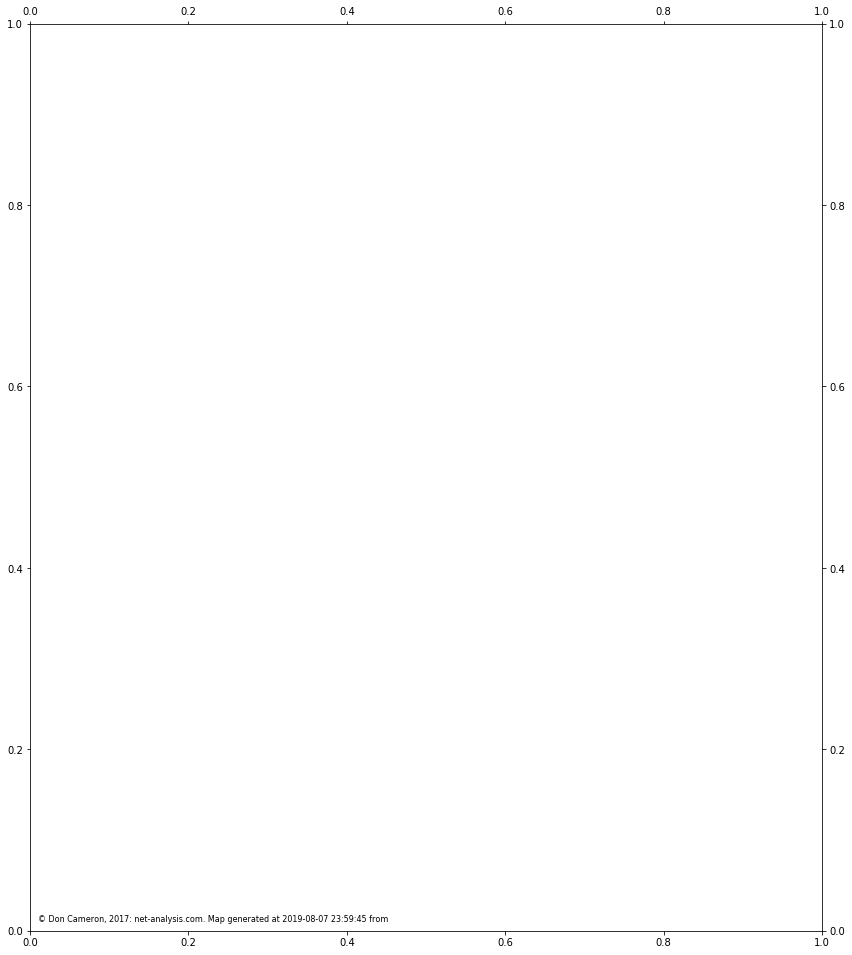

In [87]:
import datetime
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,12))

# ------------------------------- Surrounding frame ------------------------------
# set up frame full height, full width of figure, this must be called first

left = -0.05
bottom = -0.05
width = 1.1
height = 1.05
rect = [left,bottom,width,height]
ax3 = plt.axes(rect)

# turn on the spines we want, ie just the surrounding frame
blank_axes(ax3)
ax3.spines['right'].set_visible(True)
ax3.spines['top'].set_visible(True)
ax3.spines['bottom'].set_visible(True)
ax3.spines['left'].set_visible(True)

ax3.text(0.01,0.01,'© Don Cameron, 2017: net-analysis.com. '+
         'Map generated at '+datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + ' from ', fontsize=8)

#### Draw the spatial data

In [88]:
import cartopy
import cartopy.crs as ccrs

LAND_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                               edgecolor='face',
                               facecolor=cartopy.feature.COLORS['land'])
    #"""land polygons, including major islands."""

    
RIVERS_10m = cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',
                                 edgecolor=cartopy.feature.COLORS['water'],
                                 facecolor='none')
    #"""single-line drainages, including lake centerlines."""

BORDERS2_10m = cartopy.feature.NaturalEarthFeature('cultural', 'admin_1_states_provinces',
                                  '10m', edgecolor='black', facecolor='none')
    #"""country boundaries.""""
    

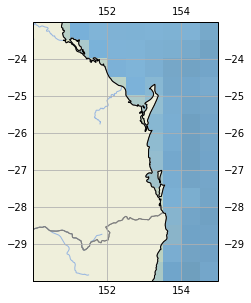

In [89]:
# ---------------------------------  Main Map -------------------------------------
#
# set up main map almost full height (allow room for title), right 80% of figure

left = 0.2
bottom = 0
width = 0.8
height = 0.90
rect = [left,bottom,width,height]

ax = plt.axes(rect, projection=ccrs.PlateCarree(), )
ax.set_extent((150, 155, -30, -23))


ax.coastlines(resolution='10m', zorder=2)

#land polygons, including major islands, use cartopy default color
ax.add_feature(LAND_10m)
ax.add_feature(RIVERS_10m)
ax.add_feature(BORDERS2_10m, edgecolor='grey')
ax.stock_img()
# stock image is good enough for example, but OCEAN_10m could be used, but very slow
#       ax.add_feature(OCEAN_10m)


ax.gridlines(draw_labels=True, xlocs=[150, 152, 154, 155])

#### Add the scale bar

In [90]:
lon0, lon1, lat0, lat1 = ax.get_extent()

# bar offset is how far from bottom left corner scale bar is (x,y) and how far up is scale bar text
bar_offset = [0.05, 0.05, 0.07]
bar_lon0 = lon0 + (lon1-lon0)*bar_offset[0]
bar_lat0 = lat0 + (lat1-lat0)*bar_offset[1]

text_lon0 = bar_lon0
text_lat0 = lat0 + (lat1-lat0)*bar_offset[2]
bar_tickmark = 20000 # metres
bar_ticks = 5
bar_alpha = 0.3

bar_color = ['black', 'red']

#### Draw the scale Bar

In [91]:
def displace(lat, lon, angle, distance):
    '''This function is used to calculate the lon and lat of another site to the current site
    angle is degree of the direction,
    distance is in km
    Ref: https://stackoverflow.com/questions/7222382/get-lat-long-given-current-point-distance-and-bearing
    
    Aug 7th, 2019
    '''
    
    import math
    
    
    R = 6378.1 #Radius of the Earth
    brng = 1.57 #Bearing is 90 degrees converted to radians.
    d = 15 #Distance in km
    
    lat1 = math.radians(lat) #Current lat point converted to radians
    lon1 = math.radians(lon) #Current long point converted to radians

    lat2 = math.asin( math.sin(lat1)*math.cos(d/R) +
    math.cos(lat1)*math.sin(d/R)*math.cos(brng))

    lon2 = lon1 + math.atan2(math.sin(brng)*math.sin(d/R)*math.cos(lat1),
    math.cos(d/R)-math.sin(lat1)*math.sin(lat2))

    lat2 = math.degrees(lat2)
    lon2 = math.degrees(lon2)
    
#     print(lat2)
#     print(lon2)
    
    return lat2, lon2

In [92]:
displace(52.20472, 0.14056, 90, 15)

(52.204622996207924, 0.3604338874899309)

In [125]:
bar_ticks

5

In [66]:
# draw a scale bar that is a set of colored line segments (bar_ticks of these), bar_tickmarks long
for i in range(bar_ticks):
     #  90 degrees = direction of horizontal scale bar
    end_lat, end_lon = displace(bar_lat0, bar_lon0, 90, bar_tickmark/1000)
    
    # capstyle must be set so line segments end square
    #TODO make transform match ax projection
    ax.plot([bar_lon0, end_lon], [bar_lat0, end_lat], color=bar_color[i%2], linewidth=20, 
            transform=ccrs.PlateCarree(), solid_capstyle='butt', alpha = bar_alpha)
    # start of next bar is end of last bar
    bar_lon0 = end_lon
    bar_lat0 = end_lat
#end for

#### Draw the scale bar text

In [93]:

import matplotlib.patheffects as PathEffects
from matplotlib import patheffects


# highlight text with white background
buffer = [patheffects.withStroke(linewidth=3, foreground="w")]
# Plot the scalebar label
units = 'km'
#TODO make transform match ax projection
t0 = ax.text(text_lon0, text_lat0, str(bar_ticks*bar_tickmark/1000) + ' ' + units, transform=ccrs.PlateCarree(),
    horizontalalignment='left', verticalalignment='bottom',
    path_effects=buffer, zorder=2)


#### Locating the map

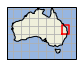

In [95]:

import cartopy.feature as cfeature


# ---------------------------------Locating Map ------------------------
#
# set up index map 20% height, left 16% of figure
left = 0
bottom = 0
width = 0.16
height = 0.2
rect = [left,bottom,width,height]


ax2 = plt.axes(rect, projection=ccrs.PlateCarree(), )
ax2.set_extent((110,160, -45, -10))
#  ax2.set_global()  will show the whole world as context

ax2.coastlines(resolution='110m', zorder=2)
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)

ax2.gridlines()


lon0,lon1,lat0,lat1 = ax.get_extent()
box_x = [lon0, lon1, lon1, lon0, lon0]
box_y = [lat0, lat0, lat1, lat1, lat0]

plt.plot(box_x, box_y, color='red',  transform=ccrs.Geodetic())

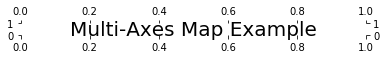

In [96]:
# -------------------------------- Title -----------------------------
# set up map title top 4% of figure, right 80% of figure

left = 0.2
bottom = 0.95
width = 0.8
height = 0.04
rect = [left,bottom,width,height]
ax6 = plt.axes(rect)
ax6.text(0.5, 0.0,'Multi-Axes Map Example', ha='center', fontsize=20)
blank_axes(ax6)

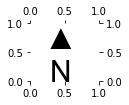

In [97]:
# ---------------------------------North Arrow  ----------------------------
#
left = 0
bottom = 0.2
width = 0.16
height = 0.2
rect = [left,bottom,width,height]
rect = [left,bottom,width,height]
ax4 = plt.axes(rect)

# need a font that support enough Unicode to draw up arrow. need space after Unicode to allow wide char to be drawm?
ax4.text(0.5, 0.0,u'\u25B2 \nN ', ha='center', fontsize=30, family='Arial', rotation = 0)
blank_axes(ax4)

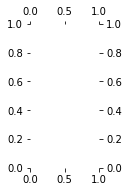

In [98]:
# ------------------------------------  Legend -------------------------------------

# legends can be quite long, so set near top of map (0.4 - bottom + 0.5 height = 0.9 - near top)
left = 0
bottom = 0.4
width = 0.16
height = 0.5
rect = [left,bottom,width,height]
rect = [left,bottom,width,height]
ax5 = plt.axes(rect)
blank_axes(ax5)

In [72]:
import matplotlib.patches as mpatches
import cartopy

# create an array of color patches and associated names for drawing in a legend
# colors are the predefined colors for cartopy features (only for example, Cartopy names are unusual)
colors = sorted(cartopy.feature.COLORS.keys())

# handles is a list of patch handles
handles = []
# names is the list of corresponding labels to appear in the legend
names = []

# for each cartopy defined color, draw a patch, append handle to list, and append color name to names list
for c in colors:
    patch = mpatches.Patch(color=cfeature.COLORS[c], label=c)
    handles.append(patch)
    names.append(c)
#end for

In [73]:
names

['land', 'land_alt1', 'water']

In [99]:
import matplotlib.lines as mlines
import cartopy.feature as cfeature

# do some example lines with colors
river = mlines.Line2D([], [], color=cfeature.COLORS['water'], marker='',
                          markersize=15, label='river')
coast = mlines.Line2D([], [], color='black', marker='',
                          markersize=15, label='coast')
bdy  = mlines.Line2D([], [], color='grey', marker='',
                  markersize=15, label='state boundary')
handles.append(river)
handles.append(coast)
handles.append(bdy)
names.append('river')
names.append('coast')
names.append('state boundary')

In [100]:
names

['land',
 'land_alt1',
 'water',
 'river',
 'coast',
 'state boundary',
 'river',
 'coast',
 'state boundary']

In [101]:
# create legend
ax5.legend(handles, names)
ax5.set_title('Legend',loc='left')

plt.show()

## Draw the scale bar
Function of drawing scale bar

In [228]:
### https://stackoverflow.com/questions/32333870/how-can-i-show-a-km-ruler-on-a-cartopy-matplotlib-plot/50674451#50674451
# Notes:

# if you don't use UTM for you axes, the bar will be drawn crooked
# the North arrow assumes north is up

import os
import cartopy.crs as ccrs
from math import floor
import matplotlib.pyplot as plt
from matplotlib import patheffects
import matplotlib

if os.name == 'nt':
    matplotlib.rc('font', family='Arial')
else:  # might need tweaking, must support black triangle for N arrow
    matplotlib.rc('font', family='DejaVu Sans')


def scale_bar(ax, length, at_x=(0.1, 0.4), at_y=(0.05, 0.075), max_stripes=2):
    """
    This fucntion is used to create scale bar using matploblit
    Ref: http://stackoverflow.com/a/35705477/1072212
    
    parameters:
        ax: the axes to draw the scalebar on.
        location: is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
        length: the length of the scalebar in km.
        max_stripes: the number of strips in the scael bar
    """
    
    # fetch axes coordinate mins+maxes
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    
    #print('The x0 and x1 are:', x0, x1)
    
    # set target rectangle in-visible-area (aka 'Axes') coordinates
    ax0, ax1 = at_x
    ay0, ay1 = at_y
    
    # choose exact X points as sensible grid ticks with Axis 'ticker' helper
    x_targets = [x0 + ax * (x1 - x0) for ax in (ax0, ax1)]
    ll = mpl.ticker.MaxNLocator(nbins=max_stripes, steps=[1,2,4,5,10])
    x_vals = ll.tick_values(*x_targets)
    
    # grab min+max for limits
    xl0, xl1 = x_vals[0], x_vals[-1]
    
    # calculate Axes Y coordinates of box top+bottom
    yl0, yl1 = [y0 + ay * (y1 - y0) for ay in [ay0, ay1]]
    
    # calculate Axes Y distance of ticks + label margins
    y_margin = (yl1-yl0)*0.25
    
    # fill black/white 'stripes' and draw their boundaries
    fill_colors = ['black', 'white']
    i_color = 0
    for xi0, xi1 in zip(x_vals[:-1],x_vals[1:]):
        # fill region
        plt.fill((xi0, xi1, xi1, xi0, xi0), (yl0, yl0, yl1, yl1, yl0),
                 fill_colors[i_color])
        # draw boundary
        plt.plot((xi0, xi1, xi1, xi0, xi0), (yl0, yl0, yl1, yl1, yl0),
                 'black')
        i_color = 1 - i_color
    
    # add short tick lines
    for x in x_vals:
        plt.plot((x, x), (yl0, yl0-y_margin), 'black')

    # add a scale legend 'Km'
    font_props = mfonts.FontProperties(size='medium', weight='normal')
    plt.text(
        0.5 * (xl0 + xl1),
        yl1 + y_margin,
        'Km',
        verticalalignment='bottom',
        horizontalalignment='center',
        fontproperties=font_props)

    # add numeric labels
    for x in x_vals:
        plt.text(x,
                 yl0 - 2 * y_margin,
                 '{:g}'.format((x - xl0) * 0.001),
                 verticalalignment='top',
                 horizontalalignment='center',
                 fontproperties=font_props)
    
    ax.text(xl0 + xl1*0.1, yl1 + (yl1-yl0)*2, u'\u25B2 \nN ', ha='center', fontsize=20, family='Arial', rotation = 0)
    

## Create a choropleth map with scale bar and north arrow

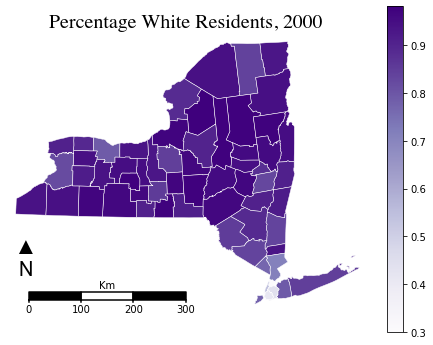

In [229]:

import cartopy.crs as ccrs
from math import floor

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

ny_census_tracts = gpd.read_file(gplt.datasets.get_path('ny_census'))
ny_census_tracts = ny_census_tracts.assign(
    percent_white=ny_census_tracts['WHITE'] / ny_census_tracts['POP2000']
)

ax = gplt.choropleth(
    ny_census_tracts,
    hue='percent_white',
    cmap='Purples', linewidth=0.5,
    edgecolor='white', k=None,
    legend=True,
    projection=gcrs.LambertConformal()
)

scale_bar(ax, 100, at_y=(0.02, 0.05))  # 100 km scale bar

plt.title("Percentage White Residents, 2000", fontname="Times", fontsize = 20)
plt.savefig("ny-state-demographics.png", bbox_inches='tight', pad_inches=0.1)


In [230]:
ny_census_tracts = gpd.read_file('data/child_blood_lead_levels_by_ct.shp')
ny_census_tracts.head()

,census_tra,data_redac,num_bll_5p,num_screen,perc_5plus,geometry
0,42101000100,0,0.0,100.0,0.0,"POLYGON ((-75.14147213273969 39.9517072267047,..."
1,42101000200,1,NaN,109.0,NaN,"POLYGON ((-75.162377698504 39.9576545523082, -..."
2,42101000300,1,NaN,110.0,NaN,"POLYGON ((-75.17820482839041 39.9598134132842,..."
3,42101000401,1,NaN,61.0,NaN,"POLYGON ((-75.1729917788024 39.9546437050483, ..."
4,42101000402,0,0.0,41.0,0.0,"POLYGON ((-75.1633313650233 39.9533392100125, ..."


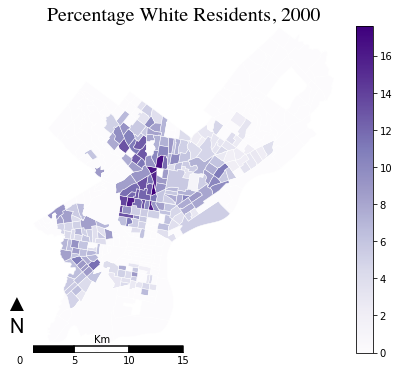

In [231]:

import cartopy.crs as ccrs
from math import floor

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

ny_census_tracts = gpd.read_file('data/child_blood_lead_levels_by_ct.shp')
# ny_census_tracts = ny_census_tracts.assign(
#     percent_white=ny_census_tracts['WHITE'] / ny_census_tracts['POP2000']
# )

ax = gplt.choropleth(
    ny_census_tracts,
    hue='perc_5plus',
    cmap='Purples', linewidth=0.5,
    edgecolor='white', k=None,
    legend=True,
    projection=gcrs.LambertConformal()
)

scale_bar(ax, 100, at_y=(0, 0.02))  # 100 km scale bar

plt.title("Percentage White Residents, 2000", fontname="Times", fontsize = 20)
plt.savefig("ny-state-demographics.png", bbox_inches='tight', pad_inches=0.1)


#### Homework 

Map the blood lead of Philadelphia, using color of 'Blues', Change the title as 'Blood lead level in Philadelphia', using the face color of black, with linewidth 0.2



The x0 and x1 are: 17031882.091370855 17054145.98952951


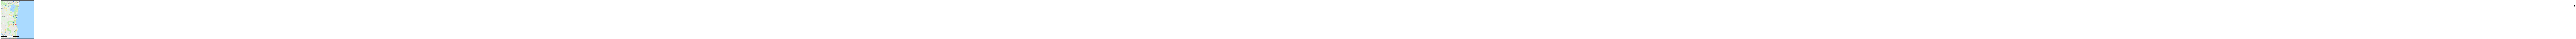

In [190]:

from cartopy.io.img_tiles import GoogleTiles

fig = plt.figure(figsize=(10,10))

tiler = GoogleTiles()
mercator = tiler.crs
ax = plt.axes(projection=mercator)

ax.set_extent(( 153, 153.2, -26.6, -26.4))

zoom = 12
ax.add_image(tiler, zoom )

# even 1:10m are too coarse for .2 degree square
#ax.coastlines('10m')

home_lat, home_lon = -26.5258277,153.0912987

# Add a marker for home
plt.plot(home_lon, home_lat, marker='o', color='red', markersize=15,
         alpha=0.7, transform=ccrs.Geodetic())

scale_bar(ax, 10)  # 100 km scale bar

plt.show()


The x0 and x1 are: 12245143.987260092 17254521.072957404


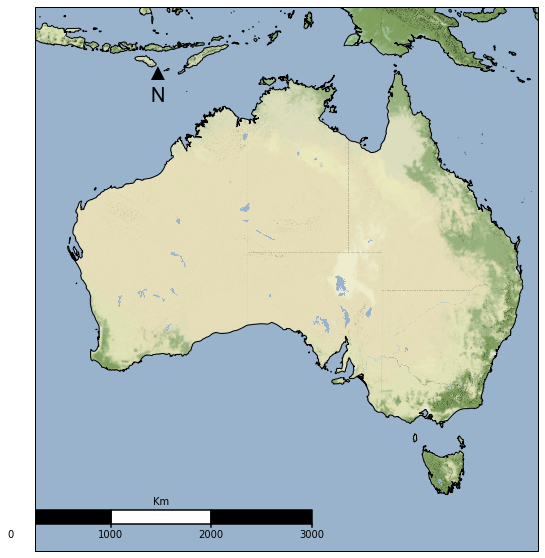

In [192]:

from cartopy.io.img_tiles import StamenTerrain

fig = plt.figure(figsize=(10,10))

tiler = StamenTerrain()
mercator = tiler.crs
ax = plt.axes(projection=mercator)
ax.set_extent((110, 155, -45, -5))

zoom = 6
ax.add_image(tiler, zoom )
scale_bar(ax, 10)  # 100 km scale bar

# extent_ax = ax.get_extent()[0]

# need a font that support enough Unicode to draw up arrow. need space after Unicode to allow wide char to be drawm?
# ax.text(0.1*int(ax.get_extent()[1]),0.1*int(ax.get_extent()[0]),  u'\u25B2 \nN ', ha='center', fontsize=30, family='Arial', rotation = 0)
# blank_axes(ax4)

ax.coastlines('10m')
plt.show()

In [180]:
type(ax.get_extent()[0])

float